# Heart Disease
## Data cleaning and data analysis

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [230]:
# The code was removed by Watson Studio for sharing.

,Age,sex,Trestbps,cholesteral,fasting_blood_sugar,max_heart_rate,exercise_induced_angina,oldpeak,number_of_vessels_colored,heart_disease,...,chest_pain_type_notang,resting_ecg_abn,resting_ecg_hyp,resting_ecg_norm,slope_down,slope_flat,slope_up,thal_fix,thal_norm,thal_rev
0,63.0,1,145.0,233.0,1,150.0,0,2.3,0.0,0,...,0,0,1,0,1,0,0,1,0,0
1,67.0,1,160.0,286.0,0,108.0,1,1.5,3.0,1,...,0,0,1,0,0,1,0,0,1,0
2,67.0,1,120.0,229.0,0,129.0,1,2.6,2.0,1,...,0,0,1,0,0,1,0,0,0,1
3,37.0,1,130.0,250.0,0,187.0,0,3.5,0.0,0,...,1,0,0,1,1,0,0,0,1,0
4,41.0,0,130.0,204.0,0,172.0,0,1.4,0.0,0,...,0,0,1,0,0,0,1,0,1,0


Text(0.5, 1.0, 'Pearson Correlation Matrix')

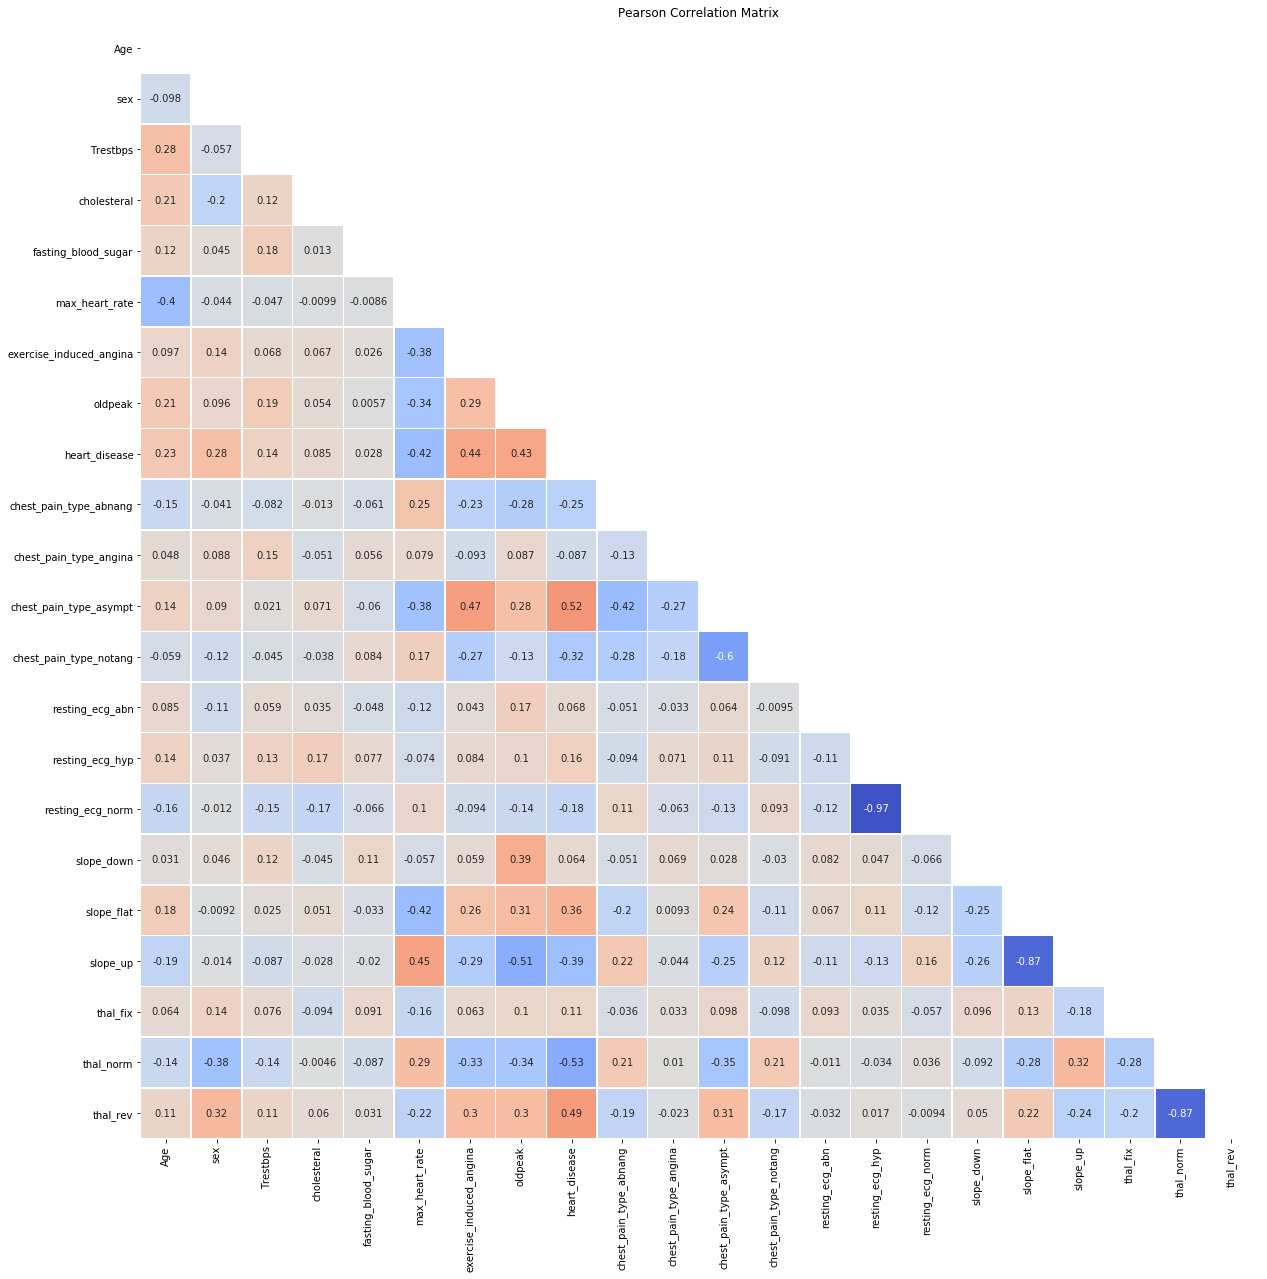

In [231]:
# Compute the correlation matrix
corr = df_hd.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax = plt.axes()
sns.heatmap(corr, cmap='coolwarm', mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar = False,annot=True,ax=ax)
ax.set_title('Pearson Correlation Matrix')

In [232]:
corr['heart_disease'].sort_values(ascending=False)

heart_disease              1.000000
chest_pain_type_asympt     0.516015
thal_rev                   0.486112
exercise_induced_angina    0.436757
oldpeak                    0.430696
slope_flat                 0.362053
sex                        0.280937
Age                        0.225439
resting_ecg_hyp            0.159775
Trestbps                   0.144931
thal_fix                   0.106589
cholesteral                0.085239
resting_ecg_abn            0.068410
slope_down                 0.063554
fasting_blood_sugar        0.028046
chest_pain_type_angina    -0.086957
resting_ecg_norm          -0.175322
chest_pain_type_abnang    -0.245879
chest_pain_type_notang    -0.316742
slope_up                  -0.394066
max_heart_rate            -0.421741
thal_norm                 -0.527334
Name: heart_disease, dtype: float64

## Heart disease prediction using 'oldpeak' and 'max_heart_rate' as features

Text(0, 0.5, 'oldpeak')

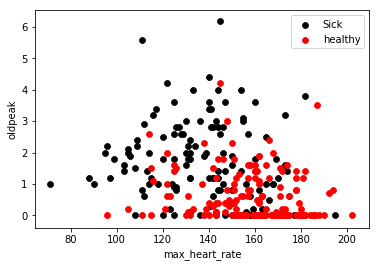

In [234]:
plt.scatter(x=df_hd[df_hd['heart_disease']==1]['max_heart_rate'],
            y=df_hd[df_hd['heart_disease']==1]['oldpeak'],
            c='k',
            label = 'Sick',
            marker = "8")

plt.scatter(x=df_hd[df_hd['heart_disease']==0]['max_heart_rate'],
            y=df_hd[df_hd['heart_disease']==0]['oldpeak'],
            c='r',
            label = 'healthy',
            marker = "8")

plt.legend()

plt.xlabel('max_heart_rate')
plt.ylabel('oldpeak')

In [235]:
Features = df_hd[['max_heart_rate','oldpeak']]
X = Features.values
y = df_hd['heart_disease'].values

In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [237]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [321]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

def train_all_models(X_train, y_train, cv = 4):

    parameters = {'n_neighbors': range(1,20),'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'metric': ['euclidean','manhattan','chebyshev','minkowski']}
    kNN = KNeighborsClassifier(weights='distance')
    clf = GridSearchCV(kNN, parameters,cv=cv,iid=True,return_train_score=True)
    clf.fit(X_train, y_train)

    # We keep best parameters
    knn = clf.best_estimator_
    knn.fit(X_train,y_train)

    parameters = {'max_depth': range(1,16),'criterion': ['gini', 'entropy']}
    dTree = DecisionTreeClassifier()
    clf = GridSearchCV(dTree, parameters,cv=cv,iid=True,return_train_score=True)
    clf.fit(X_train, y_train)

    # We keep best parameters
    dTree = clf.best_estimator_
    dTree.fit(X_train ,y_train)

    parameters = {'C': (0.001,0.01,0.1,1,10),'kernel': ['linear','poly','rbf','sigmoid']}
    SVM = svm.SVC(gamma='auto',probability=True)
    clf = GridSearchCV(SVM, parameters,cv=cv,iid=True,return_train_score=True)
    clf.fit(X_train , y_train)

    # We keep best parameters
    SVM = clf.best_estimator_
    SVM.fit(X_train ,y_train)

    parameters = {'C': (0.001,0.01,0.1,1,10),'penalty': ['l2','l1'],
                  'solver':['liblinear', 'saga']}
    LR = LogisticRegression()
    clf = GridSearchCV(LR, parameters,cv=cv,iid=True,return_train_score=True)
    clf.fit(X_train , y_train)

    # We keep best parameters
    LR = clf.best_estimator_
    LR.fit(X_train ,y_train)

    parameters = {'hidden_layer_sizes': range(1,20)}
    ANN = MLPRegressor(solver="lbfgs",activation='relu',tol=1e-12,max_iter=1200
                        ,learning_rate = "adaptive",verbose=0)
    ANN.out_activation_ = 'sigmoid'
    clf = GridSearchCV(ANN, parameters,cv=cv)
    clf.fit(X_train , y_train)

    # We keep best parameters
    ANN = clf.best_estimator_
    ANN.fit(X_train ,y_train)
    
    return [knn, dTree, SVM, LR, ANN]

def tests_all_models(knn, dTree, SVM, LR, ANN, X_test, y_test):

    yhat_KNN = knn.predict(X_test)
    yhat_proba_KNN = knn.predict_proba(X_test)
    yhat_DT = dTree.predict(X_test)
    yhat_proba_DT = dTree.predict_proba(X_test)
    yhat_SVM = SVM.predict(X_test)
    yhat_proba_SVM = SVM.predict_proba(X_test)
    yhat_LR = LR.predict(X_test)
    yhat_proba_LR = LR.predict_proba(X_test)
    yhat_proba_ANN = ANN.predict(X_test)
    yhat_ANN = yhat_proba_ANN>0.5
    df_test_score = pd.DataFrame({'Jaccard':[jaccard_similarity_score(y_test, yhat_KNN),
                                             jaccard_similarity_score(y_test, yhat_DT),
                                             jaccard_similarity_score(y_test, yhat_SVM),
                                             jaccard_similarity_score(y_test, yhat_LR),
                                             jaccard_similarity_score(y_test, yhat_ANN)],
                                 'F1-score':[ f1_score(y_test, yhat_KNN),
                                              f1_score(y_test, yhat_DT),
                                              f1_score(y_test, yhat_SVM),
                                              f1_score(y_test, yhat_LR),
                                              f1_score(y_test, yhat_ANN)],
                                 'LogLoss':[log_loss(y_test, yhat_proba_KNN),
                                            log_loss(y_test, yhat_proba_DT),
                                            log_loss(y_test, yhat_proba_SVM),
                                            log_loss(y_test, yhat_proba_LR),
                                            log_loss(y_test, yhat_proba_ANN)]})
    df_test_score.index = ['KNN','Decision Tree','SVM','LogisticRegression','Neural Network']
    df_test_score = round(df_test_score,3)
    df_test_score[['Jaccard','F1-score']] *= 100
    df_test_score.sort_values(by='LogLoss',ascending=True, inplace=True)

    return df_test_score

## Results for 2 features

In [239]:
# We train the models
[knn, dTree, SVM, LR, ANN] = train_all_models(X_train, y_train, 4)
# We compute the performance
df_test_score_with_2_ft = tests_all_models(knn, dTree, SVM, LR, ANN, X_test, y_test)
df_test_score_with_2_ft

,Jaccard,F1-score,LogLoss
SVM,73.6,67.6,0.557
LogisticRegression,75.8,71.8,0.676
Neural Network,72.5,66.7,0.904
Decision Tree,73.6,67.6,1.997
KNN,71.4,66.7,2.718


### Visualization of the Logistic Regression classification

Text(0, 0.5, 'oldpeak')

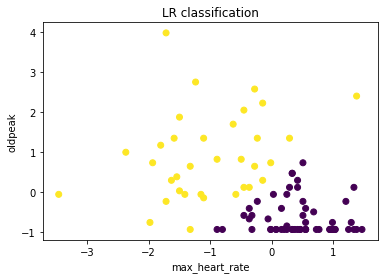

In [240]:
plt.title('LR classification')
plt.scatter(x=X_test[:,0],
            y=X_test[:,1],
            c=LR.predict(X_test))

plt.xlabel('max_heart_rate')
plt.ylabel('oldpeak')

Text(0, 0.5, 'oldpeak')

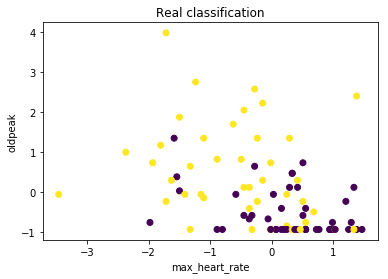

In [241]:
plt.scatter(x=X_test[:,0],
            y=X_test[:,1],
            c=y_test)

plt.title('Real classification')
plt.xlabel('max_heart_rate')
plt.ylabel('oldpeak')

## Could we best perform using all the features ?

In [242]:
Features = df_hd.drop(columns='heart_disease')

X = Features.values.astype(float)
X[np.where(np.isnan(X))] = float(Features['number_of_vessels_colored'].value_counts().index[0])
y = df_hd['heart_disease'].values

import warnings
warnings.filterwarnings("ignore")

seed = 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [243]:
# We train the models
[knn, dTree, SVM, LR, ANN] = train_all_models(X_train, y_train, 4)
# We compute the performance
df_test_score_all = tests_all_models(knn, dTree, SVM, LR, ANN, X_test, y_test)
df_test_score_all

,Jaccard,F1-score,LogLoss
SVM,87.9,86.4,0.357
Neural Network,84.6,84.1,0.397
LogisticRegression,86.8,85.4,0.435
KNN,83.5,82.4,0.704
Decision Tree,80.2,78.0,0.903


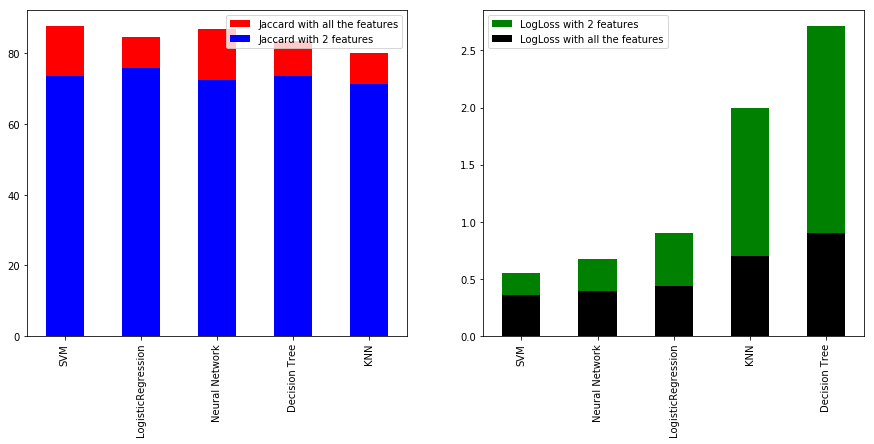

In [244]:
fig, axes = plt.subplots(figsize=(15,6),nrows=1, ncols=2)

df_test_score_all['Jaccard'].plot(ax=axes[0],kind='bar',color=['r'],label='Jaccard with all the features',legend=True)
df_test_score_with_2_ft['Jaccard'].plot(ax=axes[0],kind='bar',color=['b'],label='Jaccard with 2 features',legend=True)
df_test_score_with_2_ft['LogLoss'].plot(ax=axes[1],kind='bar',color='g',label='LogLoss with 2 features',legend=True)
df_test_score_all['LogLoss'].plot(ax=axes[1],kind='bar',color='k',label='LogLoss with all the features',legend=True)

# Features selection and extraction

In [245]:
def normalize(x):
    return 100*(abs(x)/np.sum(abs(x)))

df_LR = pd.DataFrame(normalize(LR.coef_.T),columns=['Weights_abs_LR'])
df_LR.index = df_hd.columns.drop('heart_disease')
df_LR = df_LR.sort_values(by='Weights_abs_LR',ascending=True,inplace=False)
# We keep the Features contribution coefficient
feat_contrib_LR_coef = normalize(LR.coef_.T).reshape(22,)
index_LR = np.argsort(feat_contrib_LR_coef)

In [246]:
def Optimal_feat_selection(X,index_ini,K):
    
    '''
    input : The features matrix X and the initial column index index_ini and the number of column K
    output : the column subset index selected, projection error
    
    We firt select the column (i.e. feature), with the maximum correlation coefficient (which is pass in argument)
    And we iteratively select the column that maximize the orthogonal projection error
    onto the linear space span the features selected.
    Assuming we have select the column c_1, ..., c_k and we denote by X_r the subset column selection matrix,
    the orthogonal projection error is given by:
                X pinv(X_r)
    '''
    
    X = X.T
    # initialization
    index = [index_ini]
    Xr = X[index,:]
    err = []
    for k in range(1,K):
        C = np.matmul(X,np.linalg.pinv(Xr))
        index_k = np.argmax(X-np.matmul(C,Xr), axis=0)
        err_k = np.max(X-np.matmul(C,Xr), axis=0)
        index.append(index_k[0])
        err.append(err_k[0])
        Xr = X[index,:]
    
    return [index, err]

In [247]:
name_index_ini = abs(corr['heart_disease'].drop('heart_disease')).idxmax()
index_ini = df_hd.columns.get_loc(name_index_ini)
K = 22
[index_CSS, err] = Optimal_feat_selection(X_train,index_ini,K)
err.append(0)
df_CSS = pd.DataFrame(err,df_hd.columns[index_CSS],columns=['Proj_err'])
df_CSS = df_CSS.sort_values(by='Proj_err',ascending=True)
# We keep the Features contribution coefficient
feat_contrib_CSS_coef = normalize(LR.coef_.T)

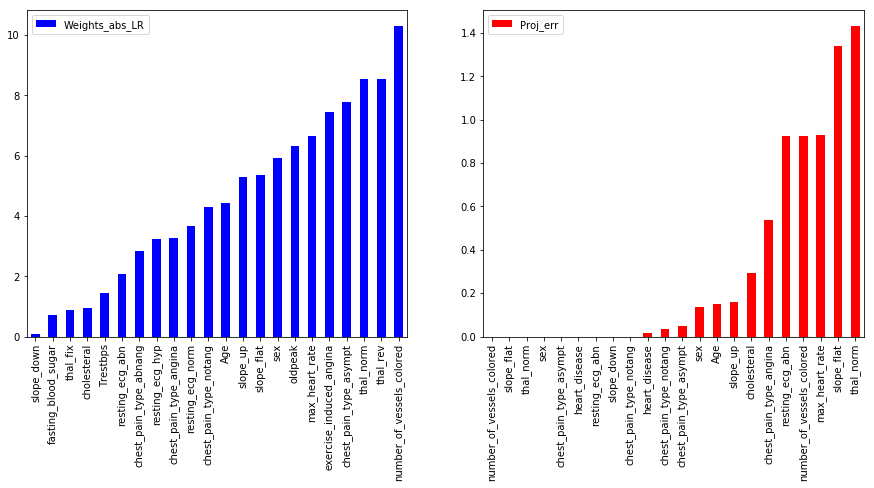

In [248]:
fig, axes = plt.subplots(figsize=(15,6),nrows=1, ncols=2)
df_LR.plot(ax=axes[0],kind='bar',color=['b'],label='Logistic Regression features contribution',legend=True)
df_CSS.plot(ax=axes[1],kind='bar',color=['r'],label='Greedy selction features contribution',legend=True)

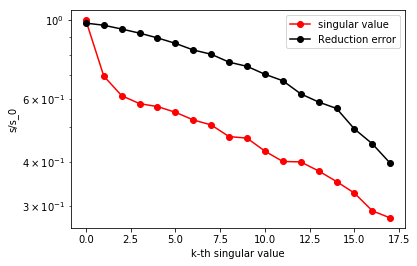

In [249]:
U,s,V = np.linalg.svd(X_train)
S = np.diag(s)
err = []
for k in range(1,len(s)-3):
    err.append(np.linalg.norm(X_train - np.matmul(np.matmul(X_train, V[:,:k]),V[:,:k].T),'fro') / np.linalg.norm(X_train,'fro'))
    
plt.plot(s[:-4]/s[0],'-o',color='r',label='singular value')
plt.plot(err,'-o',color='k',label='Reduction error')
plt.yscale('log')
plt.xlabel('k-th singular value')
plt.ylabel('s/s_0')
plt.legend()

In [297]:
def feature_selection(X_train, y_train, X_test, y_test, index):
    
    scores = []
   
    for k in range(1,23):
       
        X_train_r = X_train[:,index[:k]]
        X_test_r = X_test[:,index[:k]]
        
        parameters = {'C': (0.001,0.01,0.1,1,10),'kernel': ['linear','poly','rbf','sigmoid']}
        LR = LogisticRegression()
        LR.fit(X_train_r ,y_train)
        
        yhat_proba = LR.predict_proba(X_test_r)
        
        scores.append(log_loss(y_test, yhat_proba))
        
        
    return scores

In [298]:
def feature_extraction(X_train, y_train, X_test, V, y_test):
    
    scores = []
   
    for k in range(1,23):
       
        X_train_r = np.matmul(X_train, V[:,:k])
        X_test_r = np.matmul(X_test, V[:,:k])
        
        LR = LogisticRegression()
        LR.fit(X_train_r ,y_train)
        
        yhat_proba = LR.predict_proba(X_test_r)
        
        scores.append(log_loss(y_test, yhat_proba))
        
    return scores

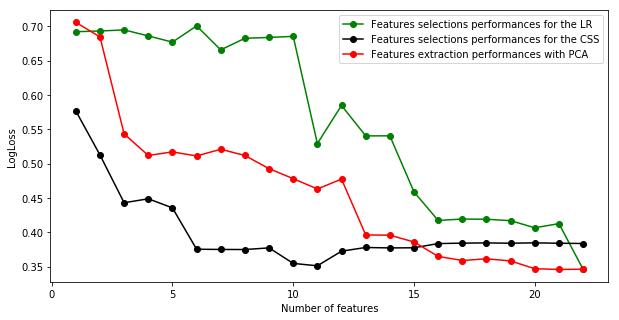

In [299]:
scores_LR = feature_selection(X_train, y_train, X_test, y_test, index_LR)
scores_CSS = feature_selection(X_train, y_train, X_test, y_test, index_CSS)
scores_SVD = feature_extraction(X_train, y_train, X_test, V, y_test)

plt.figure(figsize=(10,5))
plt.plot(range(1,23),scores_LR,'-o',color='g', label='Features selections performances for the LR')
plt.plot(range(1,23),scores_CSS,'-o',color='k', label='Features selections performances for the CSS')
plt.plot(range(1,23),scores_SVD,'-o',color='r', label='Features extraction performances with PCA')
plt.ylabel('LogLoss')
plt.xlabel('Number of features')
plt.legend()

In [300]:
from sklearn.metrics import confusion_matrix

def plot_fp_fn(K):
    
    LR = LogisticRegression()

    X_train_r = X_train[:,index_LR[:K]]
    X_test_r = X_test[:,index_LR[:K]]

    LR.fit(X_train_r ,y_train)

    yhat = LR.predict(X_test_r)

    FP_LR = 100*(confusion_matrix(y_test, yhat)[0,1] / (confusion_matrix(y_test, yhat)[0,1] + confusion_matrix(y_test, yhat)[0,0]))
    FN_LR = 100*(confusion_matrix(y_test, yhat)[1,0] / (confusion_matrix(y_test, yhat)[1,0] + confusion_matrix(y_test, yhat)[1,1]))


    X_train_r = X_train[:,index_CSS[:K]]
    X_test_r = X_test[:,index_CSS[:K]]

    LR.fit(X_train_r ,y_train)

    yhat = LR.predict(X_test_r)

    FP_LR = 100*(confusion_matrix(y_test, yhat)[0,1] / (confusion_matrix(y_test, yhat)[0,1] + confusion_matrix(y_test, yhat)[0,0]))
    FN_LR = 100*(confusion_matrix(y_test, yhat)[1,0] / (confusion_matrix(y_test, yhat)[1,0] + confusion_matrix(y_test, yhat)[1,1]))

    X_train_r = np.matmul(X_train, V[:,:K])
    X_test_r = np.matmul(X_test, V[:,:K])

    LR.fit(X_train_r ,y_train)

    yhat = LR.predict(X_test_r)

    FP_LR = 100*(confusion_matrix(y_test, yhat)[0,1] / (confusion_matrix(y_test, yhat)[0,1] + confusion_matrix(y_test, yhat)[0,0]))
    FN_LR = 100*(confusion_matrix(y_test, yhat)[1,0] / (confusion_matrix(y_test, yhat)[1,0] + confusion_matrix(y_test, yhat)[1,1]))

    df_fp_fn = pd.DataFrame({'False Positive':[FP_LR,FP_CSS,FP_SVD],'False Negative':[FN_LR,FN_CSS,FN_SVD]},index=['Logistic Regression Weights',
                                                                                                        'Columns Subset Selection',
                                                                                                        'PCA'])

    df_fp_fn.plot(kind='barh')
    print('False Negative rate:\n\n',df_fp_fn['False Negative'])

False Negative rate:

 Logistic Regression Weights    38.636364
Columns Subset Selection       10.000000
PCA                            14.000000
Name: False Negative, dtype: float64


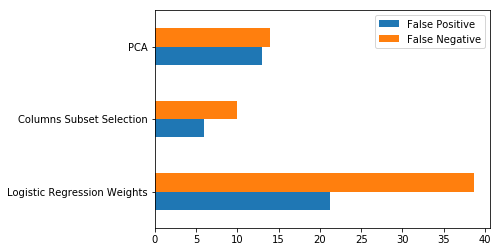

In [301]:
plot_fp_fn(5)

False Negative rate:

 Logistic Regression Weights    18.181818
Columns Subset Selection       10.000000
PCA                            14.000000
Name: False Negative, dtype: float64


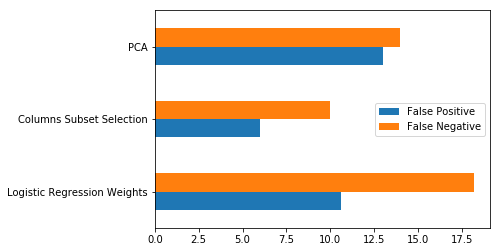

In [302]:
plot_fp_fn(22)

In [319]:
from sklearn.metrics import make_scorer

def metric_fn(y_true,y_pred):
    return 100*(round(confusion_matrix(y_true, y_pred)[1,0] / (confusion_matrix(y_true, y_pred)[1,0] + confusion_matrix(y_true, y_pred)[1,1]),3))

score = make_scorer(metric_fn, greater_is_better=False)

X_train_r = X_train
X_test_r = X_test

parameters = {'C': (1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5),'penalty': ['l2','l1'],'solver':['liblinear', 'saga']}

LR = LogisticRegression()
clf = GridSearchCV(LR, parameters,cv=4,iid=True,return_train_score=True)

clf.fit(X_train , y_train)

yhat = clf.predict(X_test)
metric_fn(y_test,yhat)

20.5